# WeRateDogs Twitter数据清理与分析
## 收集

In [24]:
# 导入需要的库
import numpy as np
import pandas as pd
import requests
import os
import json

1. `twitter_archive_enhanced.csv` 已经提供，其中包含了一些主要的推特信息，是本次清洗的主要数据，其中的评分、地位和名字等数据是从 text 原文中提取的，但是提取的并不好，评分并不都是正确的，狗的名字和地位也有不正确的 。如果想用评分、地位和名字进行分析和可视化，需要评估和清洗这些列。

In [25]:
# 收集文件 twitter_archive_enhanced.csv, 保存为 dataframe
twitter_dog = pd.read_csv('twitter_archive_enhanced.csv')

2. 编程下载收集互联网文件：`image-predictions.tsv`，其中包含了推特图像预测信息，根据推特中的图片预测出狗狗种类；  
这个文件需要使用 `Python` 的 `Requests` 库和以下提供的 `URL` 来进行编程下载。   
`URL` ：https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv

In [26]:
# 收集文件 image-predictions.tsv, 保存为 dataframe
url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [27]:
file_name = url.split('/')[-1]
file_name

'image-predictions.tsv'

In [28]:
with open(file_name, mode='wb') as file:
    file.write(response.content)

In [29]:
image_prediction = pd.read_csv(file_name, sep='\t', encoding='utf8')

3. 由于无法访问 `Twitter` ，直接读取项目中提供的 `tweet_json.txt` 文件，从中提取所需数据。  
至少需要提取转发数（`retweet_count`）和喜欢数（`favorite_count`）这两列。

In [30]:
# 收集文件 tweet_json.txt, 保存为 dataframe
tweet = []
with open('tweet_json.txt', 'r') as json_file:
    for line in json_file.readlines():
        dic = json.loads(line)
        tweet.append(dic)

In [31]:
tweet_json = pd.DataFrame.from_dict(tweet)

## 评估
### 目测评估

In [32]:
twitter_dog

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available fo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD3...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and sh...",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/st...",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breath...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more thing...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you...,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/st...",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettabl...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theor...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14,10,Cassie,doggo,None,None,None


**`twitter_dog` 表格**
- `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`这几列有很多的空值
- 狗狗的地位（stage）分成了多列，可以合并为一列`stage`
- 有些行数据狗狗四种地位的值均为`None`，表示缺少地位值
- `source`列的值为html的a标签格式

In [33]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


**image_prediction:**
- 狗狗图片的预测结果`p1`, `p2`, `p3`三列有的首字母大写，有些没有，不符合一致性

In [14]:
tweet_json

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39492,False,This is Phineas. He's a mystical boy. Only eve...,None,...,False,NaN,NaN,NaN,8842,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33786,False,This is Tilly. She's just checking pup on you....,None,...,False,NaN,NaN,NaN,6480,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25445,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,False,NaN,NaN,NaN,4301,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42863,False,This is Darla. She commenced a snooze mid meal...,None,...,False,NaN,NaN,NaN,8925,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41016,False,This is Franklin. He would like you to stop ca...,None,...,False,NaN,NaN,NaN,9721,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,None,None,Sat Jul 29 00:08:17 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",20548,False,Here we have a majestic great white breaching ...,None,...,False,NaN,NaN,NaN,3240,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,None,None,Fri Jul 28 16:27:12 +0000 2017,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",12053,False,Meet Jax. He enjoys ice cream so much he gets ...,None,...,False,NaN,NaN,NaN,2142,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,None,None,Fri Jul 28 00:22:40 +0000 2017,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",66596,False,When you watch your owner call another dog a g...,None,...,False,NaN,NaN,NaN,19548,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,None,None,Thu Jul 27 16:25:51 +0000 2017,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",28187,False,This is Zoey. She doesn't want to be one of th...,None,...,False,NaN,NaN,NaN,4403,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,None,None,Wed Jul 26 15:59:51 +0000 2017,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",32467,False,This is Cassie. She is a college pup. Studying...,None,...,False,NaN,NaN,NaN,7684,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835'

**`tweet_json` 表格**
- `contributors`, `coordinates`两列有大量的`None`值
- `quoted_status`, `quoted_status_id`, `quoted_status_id_str`三列存在大量空值
- `id`列名对应于`twitter_dog`的列名`tweet_id`，列名应该统一

### 编程评估

In [36]:
twitter_dog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [316]:
twitter_dog.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [38]:
twitter_dog.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

**twitter_dog:**
- `timestamp`不是datetime格式
- 评分分母通常是10，不是10的那些数据可能是文本提取错误
- 从记录的text可以看到分子有13.5这样的数，所以rating_numerator类型应该为float 
- `source`总共有四种分类，应该转为`category`数据类型

In [37]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [46]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2352 non-null object
display_text_range               2352 non-null object
entities                         2352 non-null object
extended_entities                2073 non-null object
favorite_count                   2352 non-null int64
favorited                        2352 non-null bool
full_text                        2352 non-null object
geo                              0 non-null object
id                               2352 non-null int64
id_str                           2352 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

In [45]:
all_columns = pd.Series(list(twitter_dog) + list(image_prediction) + list(tweet_json))
all_columns[all_columns.duplicated()]

17                 tweet_id
42    in_reply_to_status_id
44      in_reply_to_user_id
57                   source
dtype: object

##### `tweet_json` 表格
- `contributors`, `coordinates`, `geo`三列没有非空值，`place`只有一个非空值
-  `tweet_json` 表格的`in_reply_to_status_id`, `in_reply_to_user_id`, `source`三列在`twitter_dog` 表格中已存在

#### 质量
##### `twitter_dog` 表格
- 根据项目要求，需要删除转发数据，只保留原始tweets
- 根据项目要求，只保留有图片的tweets
- `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`这几列有很多的空值
- 有些行数据狗狗四种地位的值均为None，表示缺少地位值
- `timestamp`不是datetime格式
- 从记录的text可以看到分子有13.5这样的数，所以rating_numerator类型应该为float 
- 评分分母通常是10，不是10的那些数据可能是文本提取错误
- `source`列的值为html的a标签格式
- `source`总共有四种分类，应该转为`category`数据类型

##### `image_prediction` 表格
- 狗狗图片的预测结果`p1`, `p2`, `p3`三列有的首字母大写，有些没有，不符合一致性

##### `tweet_json` 表格
- `contributors`, `coordinates`, `geo`三列没有非空值，`place`只有一个非空值
- `id`列名对应于`twitter_dog`的列名`tweet_id`，列名应该统一
-  `tweet_json` 表格的`in_reply_to_status_id`, `in_reply_to_user_id`, `source`三列在`twitter_dog` 表格中已存在

#### 整洁度
- `twitter_dog` 表格中狗狗的地位（stage）分成了多列，可以合并为一列`stage`
- `image_prediction` 表格的图片预测结果和`tweet_json` 表格的转发数和喜爱数是`twitter_dog` 表格的一部分
- `twitter_dog` 表格需要增加新的一列计算评分比值


## 清理

In [47]:
# 备份三个数据集
twitter_dog_clean = twitter_dog.copy()
image_prediction_clean = image_prediction.copy()
tweet_json_clean = tweet_json.copy()

### 质量
#### `twitter_dog` 表格
- 根据项目要求，需要删除转发数据，只保留原始tweets

##### 定义
`retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`这三列属于转发信息，也就是说这三列为空值的属于原始tweets，所以删除这三列为空值的行数据即可，原始数据为2356条，删除完应该剩余2175条数据

##### 代码

In [59]:
twitter_dog_clean.retweeted_status_id.isnull().sum()

2175

In [62]:
twitter_dog_clean = twitter_dog_clean[twitter_dog_clean.retweeted_status_id.isnull()]

##### 测试

In [64]:
twitter_dog_clean.retweeted_status_id.value_counts()

Series([], Name: retweeted_status_id, dtype: int64)

In [65]:
twitter_dog_clean.shape

(2175, 17)

- 根据项目要求，只保留有图片的tweets

##### 定义
由于`image_prediction`表格没有空值，将`image_prediction`表格与`twitter_dog`表格以inner jion的方式合并即可只保留有图片的tweets

##### 代码

In [74]:
twitter_dog_clean = pd.merge(twitter_dog_clean, image_prediction_clean, on=['tweet_id'], how='inner')

##### 测试

In [78]:
twitter_dog_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 28 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
jpg_url                       1994 non

In [ ]:
twitter_dog_clean.jpg_url.isnull().sum()

- `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`这几列有很多的空值

##### 定义
由于现在`retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`这三列没有非空值，可以直接删除这三列，`in_reply_to_status_id`, `in_reply_to_user_id`两列暂时保留，不作处理

##### 代码

In [79]:
twitter_dog_clean.drop(['retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp'], axis=1, inplace=True)

##### 测试

In [80]:
twitter_dog_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [81]:
twitter_dog_clean.shape

(1994, 25)

- 有些行数据狗狗四种地位的值均为None，表示缺少地位值

##### 定义
观察发现，很多文本里确实就没有狗狗的地位值，所以缺少地位值是正常情况，暂不做处理

##### 代码

In [83]:
temp = twitter_dog_clean[((twitter_dog_clean.doggo == 'None') & (twitter_dog_clean.floofer == 'None') 
                  & (twitter_dog_clean.pupper == 'None') & (twitter_dog_clean.puppo == 'None'))]

In [92]:
temp.shape

(1688, 25)

In [88]:
pd.set_option('max_colwidth',200)

In [91]:
temp[['text', 'doggo', 'floofer', 'pupper', 'puppo']]

,text,doggo,floofer,pupper,puppo
0,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,None,None,None,None
1,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",None,None,None,None
2,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,None,None,None,None
3,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,None,None,None,None
4,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",None,None,None,None
5,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,None,None,None,None
6,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,None,None,None,None
7,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,None,None,None,None
8,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,None,None,None,None
10,This is Koda. He is a South Australian deckshark. Deceptively deadly. Frighteningly majestic. 13/10 would risk a petting #BarkWeek https://t.co/dVPW0B0Mme,None,None,None,None


- `timestamp` 不是datetime格式

##### 定义
将`timestamp` 转为datetime格式

##### 代码

In [93]:
twitter_dog_clean.timestamp = pd.to_datetime(twitter_dog_clean.timestamp)

##### 测试

In [94]:
twitter_dog_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 25 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
doggo                    1994 non-null object
floofer                  1994 non-null object
pupper                   1994 non-null object
puppo                    1994 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                

- 从记录的text可以看到分子有13.5这样的数，所以rating_numerator类型应该为float 

##### 定义
从`text`中重新提取评分数据

##### 代码

In [100]:
rating = twitter_dog_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
rating.columns = ['rating_numerator', 'rating_denominator']
twitter_dog_clean['rating_numerator'] = rating['rating_numerator'].astype(float)
twitter_dog_clean['rating_denominator'] = rating['rating_denominator'].astype(float)  

##### 测试

In [105]:
twitter_dog_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 25 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null float64
rating_denominator       1994 non-null float64
name                     1994 non-null object
doggo                    1994 non-null object
floofer                  1994 non-null object
pupper                   1994 non-null object
puppo                    1994 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2            

- 评分分母通常是10，不是10的那些数据可能是文本提取错误

##### 定义
观察评分分母值不为10的数据，如是提取错误，进行手动替换

##### 代码

In [106]:
temp = twitter_dog_clean[twitter_dog_clean.rating_denominator != 10]

In [108]:
temp[['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
323,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0
385,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24.0,7.0
662,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150.0
800,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9.0,11.0
848,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170.0
891,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4.0,20.0
925,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50.0,50.0
946,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0
970,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0
988,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50.0


根据观察，以下索引号为提取错误：
- 800: 14/10
- 891: 13/10
- 925: 11/10
- 1328: 10/10
- 1973: 9/10

由于有些评分分母值不为10，无法只根据分子值进行比较，所以需要增加新的一列计算评分比值。

In [116]:
twitter_dog_clean.loc[800, ['rating_numerator', 'rating_denominator']] = (14.0, 10.0)
twitter_dog_clean.loc[891, ['rating_numerator', 'rating_denominator']] = (13.0, 10.0)
twitter_dog_clean.loc[925, ['rating_numerator', 'rating_denominator']] = (11.0, 10.0)
twitter_dog_clean.loc[1328, ['rating_numerator', 'rating_denominator']] = (10.0, 10.0)
twitter_dog_clean.loc[1973, ['rating_numerator', 'rating_denominator']] = (9.0, 10.0)

##### 测试

In [119]:
twitter_dog_clean.loc[[800, 891, 925, 1328, 1973], ['text', 'rating_numerator', 'rating_denominator']] 

,text,rating_numerator,rating_denominator
800,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",14.0,10.0
891,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,13.0,10.0
925,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,11.0,10.0
1328,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,10.0,10.0
1973,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,9.0,10.0


- `source`列的值为html的a标签格式

##### 定义
提取出`>`和`</a>`之间的内容

##### 代码

In [124]:
twitter_dog_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1955
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [129]:
twitter_dog_clean.source = twitter_dog_clean.source.str.extract('\>(\D+)\<', expand=True)

##### 测试

In [131]:
twitter_dog_clean.source.value_counts()

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

- `source`总共有四种分类，应该转为`category`数据类型

##### 定义
将`source`转为`category`数据类型

##### 代码

In [132]:
twitter_dog_clean.source = twitter_dog_clean.source.astype('category')

##### 测试

In [133]:
twitter_dog_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 25 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null category
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null float64
rating_denominator       1994 non-null float64
name                     1994 non-null object
doggo                    1994 non-null object
floofer                  1994 non-null object
pupper                   1994 non-null object
puppo                    1994 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2          

#### `image_prediction` 表格
- 狗狗图片的预测结果`p1`, `p2`, `p3`三列有的首字母大写，有些没有，不符合一致性


##### 定义
由于`image_prediction` 表格已经与`twitter_dog`表格合并，直接在`twitter_dog`表格中将`p1`, `p2`, `p3`三列改为全小写形式

##### 代码

In [134]:
twitter_dog_clean.p1 = twitter_dog_clean.p1.str.lower()
twitter_dog_clean.p2 = twitter_dog_clean.p2.str.lower()
twitter_dog_clean.p3 = twitter_dog_clean.p3.str.lower()

##### 测试

In [136]:
twitter_dog_clean[['p1', 'p2', 'p3']]

,p1,p2,p3
0,orange,bagel,banana
1,chihuahua,pekinese,papillon
2,chihuahua,malamute,kelpie
3,paper_towel,labrador_retriever,spatula
4,basset,english_springer,german_short-haired_pointer
5,chesapeake_bay_retriever,irish_terrier,indian_elephant
6,appenzeller,border_collie,ice_lolly
7,pomeranian,eskimo_dog,pembroke
8,irish_terrier,irish_setter,chesapeake_bay_retriever
9,pembroke,cardigan,chihuahua


#### `tweet_json` 表格

- `contributors`, `coordinates`, `geo`三列没有非空值，`place`只有一个非空值

##### 定义
删除`contributors`, `coordinates`, `geo`三列，`place`暂时保留

##### 代码

In [159]:
tweet_json_clean.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'retweet_count', 'retweeted', 'retweeted_status', 'source', 'truncated',
       'user'],
      dtype='object')

In [160]:
tweet_json_clean.drop(['contributors', 'coordinates', 'geo'], axis=1, inplace=True)

##### 测试

In [161]:
tweet_json_clean.columns

Index(['created_at', 'display_text_range', 'entities', 'extended_entities',
       'favorite_count', 'favorited', 'full_text', 'id', 'id_str',
       'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'retweet_count',
       'retweeted', 'retweeted_status', 'source', 'truncated', 'user'],
      dtype='object')

- `id`列名对应于`twitter_dog`的列名`tweet_id`，列名应该统一

##### 定义
修改列名`id`为`tweet_id`

##### 代码

In [164]:
tweet_json_clean.rename(columns={'id': 'tweet_id'}, inplace=True);

##### 测试

In [165]:
tweet_json_clean.columns

Index(['created_at', 'display_text_range', 'entities', 'extended_entities',
       'favorite_count', 'favorited', 'full_text', 'tweet_id', 'id_str',
       'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'retweet_count',
       'retweeted', 'retweeted_status', 'source', 'truncated', 'user'],
      dtype='object')

-  `tweet_json` 表格的`in_reply_to_status_id`, `in_reply_to_user_id`, `source`三列在`twitter_dog` 表格中已存在

##### 定义
为避免重复，删除这三列：`in_reply_to_status_id`, `in_reply_to_user_id`, `source`

##### 代码

In [167]:
tweet_json_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'source'], axis=1, inplace=True)

##### 测试

In [168]:
tweet_json_clean.columns

Index(['created_at', 'display_text_range', 'entities', 'extended_entities',
       'favorite_count', 'favorited', 'full_text', 'tweet_id', 'id_str',
       'in_reply_to_screen_name', 'in_reply_to_status_id_str',
       'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'retweet_count',
       'retweeted', 'retweeted_status', 'truncated', 'user'],
      dtype='object')

### 整洁度
- `twitter_dog` 表格中狗狗的地位（stage）分成了多列，可以合并为一列`stage`

##### 定义
由于有的一个狗狗有两种地位，所以重新从文本中提取值作为新的一列`stage`，并删除原来的四列：`doggo`, `floofer`, `pupper`, `puppo`

##### 代码

In [183]:
twitter_dog_clean['stage'] = twitter_dog_clean.text.str.lower().str.findall(r'(doggo|floof|pupper|puppo)') #取原始数据

In [184]:
twitter_dog_clean['stage'] = twitter_dog_clean.stage.apply(lambda x:set(x)) # 去重
twitter_dog_clean['stage'] = twitter_dog_clean.stage.apply(lambda x:';'.join(x)) # 含一个以上值的用分号隔开
twitter_dog_clean['stage'] = twitter_dog_clean.stage.replace('',np.nan) # 空数据设为Nan
twitter_dog_clean.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace = True) #数据处理完之后将源数据列删除

##### 测试

In [185]:
twitter_dog_clean.stage.value_counts()

pupper          227
doggo            67
floof            34
puppo            27
pupper;doggo      9
floof;doggo       2
puppo;doggo       2
floof;pupper      1
Name: stage, dtype: int64

In [186]:
twitter_dog_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 22 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null category
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null float64
rating_denominator       1994 non-null float64
name                     1994 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       1994 non-null object
p2_conf                  1994 non-null float64
p2_dog                   1994 non-null bool
p3                       1994 non-null object
p3_conf      

- `twitter_dog` 表格需要增加新的一列计算评分比值

##### 定义
计算`rating_numerator`和`rating_denominator`比值作为新的一列`rating`，并删除`rating_numerator`和`rating_denominator`两列

##### 代码

In [188]:
twitter_dog_clean['rating'] = twitter_dog_clean.rating_numerator / twitter_dog_clean.rating_denominator

In [190]:
twitter_dog_clean.drop(['rating_numerator','rating_denominator'],axis=1,inplace = True)

##### 测试

In [192]:
twitter_dog_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 21 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null category
text                     1994 non-null object
expanded_urls            1994 non-null object
name                     1994 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       1994 non-null object
p2_conf                  1994 non-null float64
p2_dog                   1994 non-null bool
p3                       1994 non-null object
p3_conf                  1994 non-null float64
p3_dog                   1994 non-null bool
stage           

- `image_prediction` 表格的图片预测结果和`tweet_json` 表格的转发数和喜爱数是`twitter_dog` 表格的一部分

##### 定义
- 由于上面的处理，`image_prediction` 表格已经合并到`twitter_dog` 表格
- 由于`tweet_json`含有较多列，我们暂且先根据项目需求提取`favorite_count`和`retweet_count`两列合并至`twitter_dog`表格

##### 代码

In [196]:
tweet_json_clean.shape

(2352, 25)

In [197]:
tweet_json_clean.columns

Index(['created_at', 'display_text_range', 'entities', 'extended_entities',
       'favorite_count', 'favorited', 'full_text', 'tweet_id', 'id_str',
       'in_reply_to_screen_name', 'in_reply_to_status_id_str',
       'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'retweet_count',
       'retweeted', 'retweeted_status', 'truncated', 'user'],
      dtype='object')

In [193]:
twitter_dog_clean.shape

(1994, 21)

In [198]:
temp = tweet_json_clean[['tweet_id', 'favorite_count', 'retweet_count']]

In [200]:
twitter_dog_clean = pd.merge(twitter_dog_clean, temp, on=['tweet_id'], how='inner')

##### 测试

In [201]:
twitter_dog_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 23 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null category
text                     1994 non-null object
expanded_urls            1994 non-null object
name                     1994 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       1994 non-null object
p2_conf                  1994 non-null float64
p2_dog                   1994 non-null bool
p3                       1994 non-null object
p3_conf                  1994 non-null float64
p3_dog                   1994 non-null bool
stage           

### 存储清理后的主数据集

In [202]:
# 将清理后的主数据集保存为 csv 文件
twitter_dog_clean.to_csv('twitter_archive_master.csv', index=False)

## 分析和可视化

In [204]:
# 分析或可视化代码
df_twitter_dog = pd.read_csv('twitter_archive_master.csv')
pd.set_option('max_colwidth',50)
df_twitter_dog.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,jpg_url,img_num,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage,rating,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,bagel,0.085851,False,banana,0.076110,False,NaN,1.3,39492,8842
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,pekinese,0.090647,True,papillon,0.068957,True,NaN,1.3,33786,6480
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,malamute,0.078253,True,kelpie,0.031379,True,NaN,1.2,25445,4301
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,labrador_retriever,0.168086,True,spatula,0.040836,False,NaN,1.3,42863,8925
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,NaN,1.2,41016,9721


In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt 

### 分析结论一
**问题**

tweets来源分布情况如何？

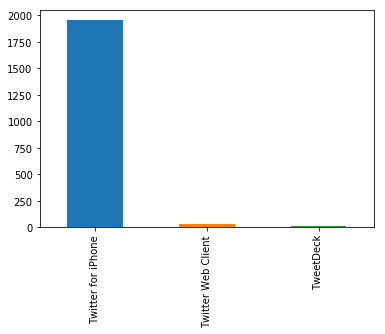

In [213]:
df_twitter_dog.source.value_counts().plot(kind='bar');

In [217]:
num_iphone = (df_twitter_dog.source == 'Twitter for iPhone').sum()
num_total = df_twitter_dog.shape[0]
num_iphone / num_total

0.9804413239719157

**结论**

由上图所示，大部分tweets都是来自iphone，占所有的tweets数据的98%

### 分析结论二

**问题**

评分比大于1的狗狗占全部的比例如何？

In [223]:
num_big = df_twitter_dog[df_twitter_dog.rating > 1].shape[0]
num_big / num_total

0.582246740220662

**结论**

评分比大于1的狗狗占总体大约58%

### 分析结论三

**问题**

转发数最高和喜爱数最多的狗狗的图片是什么样的？

In [225]:
pd.set_option('max_colwidth',100)
df_twitter_dog[df_twitter_dog.retweet_count == df_twitter_dog.retweet_count.max()].jpg_url

775    https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg
Name: jpg_url, dtype: object

![Image](https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg)

- 上面的狗狗的图片是转发数最多的。

In [226]:
df_twitter_dog[df_twitter_dog.favorite_count == df_twitter_dog.favorite_count.max()].jpg_url

309    https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg
Name: jpg_url, dtype: object

![image](https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg)

- 这个图片是喜爱数最多的狗狗的图片

### 分析结论四

**问题**

三个预测结果均为False的占比如何？

In [232]:
temp = df_twitter_dog[~(df_twitter_dog.p1_dog | df_twitter_dog.p2_dog | df_twitter_dog.p3_dog)]

In [234]:
temp[['text', 'name', 'stage', 'rating', 'jpg_url', 'p1_dog', 'p2_dog', 'p3_dog']]

,text,name,stage,rating,jpg_url,p1_dog,p2_dog,p3_dog
0,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t....,Phineas,NaN,1.3,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,False,False,False
21,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: r...,such,NaN,1.4,https://pbs.twimg.com/ext_tw_video_thumb/887517108413886465/pu/img/WanJKwssZj4VJvL9.jpg,False,False,False
27,This is Derek. He's late for a dog meeting. 13/10 pet...al to the metal https://t.co/BCoWue0abA,Derek,NaN,1.3,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,False,False,False
50,Meet Elliot. He's a Canadian Forrest Pup. Unusual number of antlers for a dog. Sneaky tongue sli...,Elliot,NaN,1.2,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,False,False,False
51,This is Louis. He's crossing. It's a big deal. 13/10 h*ckin breathtaking https://t.co/D0wb1GlKAt,Louis,NaN,1.3,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,False,False,False
60,This is Steven. He has trouble relating to other dogs. Quite shy. Neck longer than average. Trop...,Steven,NaN,1.1,https://pbs.twimg.com/media/DDMD_phXoAQ1qf0.jpg,False,False,False
91,Real funny guys. Sending in a pic without a dog in it. Hilarious. We'll rate the rug tho because...,None,NaN,1.1,https://pbs.twimg.com/media/DBW35ZsVoAEWZUU.jpg,False,False,False
95,Meet Clifford. He's quite large. Also red. Good w kids. Somehow never steps on them. Massive poo...,Clifford,NaN,1.4,https://pbs.twimg.com/media/DBMV3NnXUAAm0Pp.jpg,False,False,False
113,We only rate dogs. Please don't send in Jesus. We're trying to remain professional and legitimat...,None,NaN,1.4,https://pbs.twimg.com/media/DAClmHkXcAA1kSv.jpg,False,False,False
116,This is Albus. He's quite impressive at hide and seek. Knows he's been found this time. 13/10 us...,Albus,NaN,1.3,https://pbs.twimg.com/media/C_03NPeUQAAgrMl.jpg,False,False,False


In [236]:
miss_num = temp.shape[0]
miss_num

308

In [238]:
miss_num / num_total

0.15446339017051153

**结论**

大约有308条数据三个预测结果均为False，打开图片链接观察发现，有些图片的预测结果应该是True，这些数据需要是需要后期人为处理的，占总数据的15%。